### Importação das bibliotecas

In [ ]:
import numpy as np 
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
from google.colab import drive
import zipfile
import seaborn as sns
import spacy as sp
import string
import random
import matplotlib.pyplot as plt

Importação para Tensorflow

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
from tensorflow.keras import layers
import tensorflow_datasets as tfds

###Carregar arquivos para processamento

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cols = ['sentiment', 'id', 'date', 'query', 'user', 'text']

Dados para Treino:

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/PLN/trainingandtestdata/train.csv',
  header=None,
  names=cols,
  engine="python",
  encoding="latin1"
)

In [ ]:
train_data.shape

(1600000, 6)

In [ ]:
train_data.tail()

,sentiment,id,date,query,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [ ]:
train_data.sentiment.unique()

array([0, 4])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


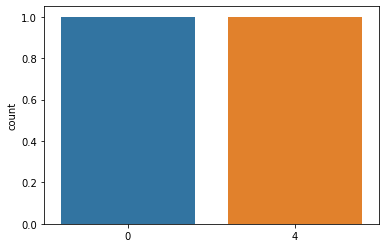

In [ ]:
sns.countplot(train_data.sentiment.unique())

Dados para Teste:

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/PLN/trainingandtestdata/test.csv",
  header=None,
  names=cols,
  engine="python",
  encoding="latin1"
)

In [ ]:
test_data.shape

(498, 6)

In [ ]:
test_data.tail()

,sentiment,id,date,query,user,text
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."
497,0,14076,Sun Jun 14 21:36:17 UTC 2009,iran,captain_pete,Reading the tweets coming out of Iran... The w...


In [ ]:
test_data.sentiment.unique()

array([4, 0, 2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


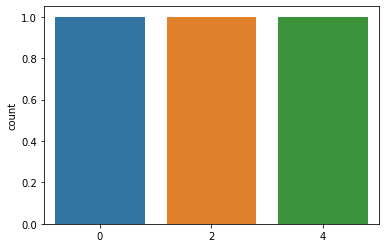

In [ ]:
sns.countplot(test_data.sentiment.unique())



---



### Limpeza dos dados

In [ ]:
#Limpeza dos dados de treinamento
data = train_data
data.drop(['id', 'date', 'query', 'user'], axis =1, inplace = True)


In [ ]:
data.tail()

In [ ]:
X = data.iloc[:, 1].values

In [ ]:
X

In [ ]:
type(X)



---



In [ ]:
y = data.iloc[:,0].values
y

In [ ]:
from sklearn.model_selection import train_test_split
X,_, y,_= train_test_split(X, y, test_size=0.85, stratify =y)

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

###Limpeza dos textos

In [ ]:
def clean_tweets(tweet):
  tweet = BeautifulSoup(tweet, 'lxml').get_text()
  tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
  tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
  tweet = re.sub(r"[^a-zA-Z.!?]", ' ', tweet)
  tweet = re.sub(r" +", ' ', tweet)
  return tweet

In [ ]:
text = "@switchfoot http://twitpic.com/2ylzl - Awww, that's a bummer. 2 You shoulds got David Carr of Third Day to do it. ;D"

In [ ]:
text = clean_tweets(text)
text

' Awww that s a bummer. You shoulds got David Carr of Third Day to do it. D'

Limpando os textos com Stop Words e pontuações: 

In [ ]:
nlp = sp.load ('en')
nlp

In [ ]:
stop_words = sp.lang.en.STOP_WORDS

In [ ]:
print(stop_words)

{'anywhere', 'anyone', 'this', 'wherein', 'whether', 'than', 'together', 'forty', 'just', 'will', "'m", 'almost', 'hereafter', 'in', 'thence', 'five', 'afterwards', 'not', 'on', 'from', "'s", 'are', 'often', 'throughout', 'towards', 'get', 'sixty', 'itself', 'everything', 'nevertheless', 'others', '’s', '‘ll', 'enough', 'along', 'be', 'least', 'can', 'alone', 'herself', 'besides', 'indeed', 'had', 'any', 'however', 'everyone', 'and', 'hundred', '‘re', 'after', 'never', 'two', 'several', 'using', 'but', 'ours', 'somehow', 'below', 'myself', 'the', 'seems', 'a', 'still', 'do', 'out', '‘s', 'above', 'three', 'have', 'whereafter', 'does', 'all', 'noone', 'own', 'seem', 'namely', 'into', 'yet', 'has', 'was', 'via', 'elsewhere', 'might', 'became', 'although', 'except', 'only', 'twelve', 'whereby', "'ll", 'perhaps', 'thus', 'last', 'latter', 'off', 'among', 'mostly', 'latterly', 'say', 'six', 'amongst', 'when', 'something', 'with', 'seemed', 'it', 'themselves', 'everywhere', 'anyhow', 'many',

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#Total de Stop Words na função
len(stop_words)

326

In [ ]:
def clean_tweets2(tweet):
  tweet = tweet.lower()
  document = nlp(tweet)

  words=[]
  for token in document:
    words.append(token.text)
  
  words = [word for word in words if word not in stop_words and word not in string.punctuation]
  words = ' '.join([str(element) for element in words])

  return words

In [ ]:
text2 = clean_tweets2(text)
text2

'  awww s bummer shoulds got david carr day d'

In [ ]:
data_clean = [clean_tweets2(clean_tweets(tweet)) for tweet in X]

In [ ]:
for _ in range(10):
  print(data_clean[random.randint(0, len(data_clean) - 1)])

mums nice relaxing day peter working silly hours weekend tho bit sucky hohum ...
  problem
saint augustine great m misssin baby
  bad missed brotha
  eh m drinking stay late work .. movies
  oh poor thing booked tickets realised pat kenny s night gutted ....
  hehehe didn t know use blog twitter suggest interesting topics ppl engage
urgh late class
shop
nt feel good


In [ ]:
data_labels = y

In [ ]:
data_labels[data_labels == 4] = 1

In [ ]:
data_labels

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
np.unique(data_labels)

array([0, 1])

###Tokenização
Transformando as palavras em números utilizando TensorFlow

In [ ]:
import math
math.pow(2,16)

65536.0

In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)

In [ ]:
tokenizer.vocab_size

52649

In [ ]:
print(tokenizer.subwords)

['  ', 's_', 'm_', 't_', ' ... ', 'good_', ' .. ', 'like_', 'got_', 'day_', 'going_', 'nt_', 'love_', 'don_', 'u_', 'work_', ' ...', 'today_', 'time_', 'know_', 'new_', 'll_', 'want_', 'think_', 'oh_', 'need_', 'lol_', 'thanks_', 'hope_', 'home_', 'night_', 've_', 'great_', 'feel_', 'd_', 'miss_', ' .... ', 'twitter_', 'wish_', 'lol', 'day', 'morning_', 'na_', 'getting_', 'gon_', 'today', 'happy_', 'bad_', 'haha_', 'sorry_', 'watching_', 'tomorrow_', 'come_', ' ..', 'nice_', 'didn_', 'fun_', 'sad_', 'way_', 'yeah_', 'sleep_', 'n_', 'work', 'hate_', 'wait_', 'hey_', 'right_', 'people_', 'better_', 'bed_', 'yes_', 'tonight_', 'having_', 'little_', 'school_', 'y_', 'week_', 'wanna_', 'long_', 'best_', 'watch_', 'thank_', 'time', 'days_', 'let_', 'feeling_', 'awesome_', 'won_', 'good', 'working_', 'e_', 'tomorrow', 'r_', 'looking_', 'o_', 'ready_', 'went_', 'ok_', 'sure_', 'night', 'ur_', 'weekend_', 'find_', 'look_', 'pretty_', 'tired_', 'man_', 'life_', 'thing_', 'maybe_', 'w_', 'trying_

In [ ]:
ids =  tokenizer.encode('i am happy')
ids

[265, 3926, 368]

In [ ]:
text = tokenizer.decode(ids)
text

'i am happy'



---



In [ ]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]

In [ ]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[1, 278, 282, 23, 7080, 45, 43, 36665]
[402, 10, 351, 190, 46]
[1, 199, 3152, 4932, 3, 6627, 46]
[195, 8361, 138, 652, 1274, 3881, 17]
[13592, 10322, 4829, 915, 160, 12, 23, 454, 63]
[1, 553, 2258, 2069]
[1, 342, 30655, 52507]
[4, 61, 255, 289, 77, 47312, 219]
[2, 6354, 1200, 2, 15527, 719, 52502]
[1, 25, 543]


###Padding (preenchimento)

In [ ]:
max_len = max([len(sentence) for sentence in data_inputs])
max_len

64

In [ ]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs, value=0, padding= 'post', maxlen = max_len)

In [ ]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[ 306 1820    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
[  112   478  6741    64    73   478 15803     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[    1  5103     6   122  4282   379    79 17470     6   616     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0    

###Divisão da base de dados em treinamento e teste

In [ ]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs,
                                                                        data_labels,
                                                                        test_size=0.3,
                                                                        stratify = data_labels)

In [ ]:
train_inputs[0]

array([   1,    2, 2579, 2733, 5445,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
train_inputs.shape

(168000, 64)

In [ ]:
train_labels.shape

(168000,)

In [ ]:
test_inputs.shape

(72000, 64)

In [ ]:
test_labels.shape

(72000,)



---
###Construção do Modelo:


In [ ]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               ffn_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)

#recebe a primeira camada
    self.embedding = layers.Embedding(vocab_size, emb_dim)

#recebe a segunda camada  
    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')

#terceira camada
    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')
#quarta camada
    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')

#camada para fazer o pooling
    self.pool = layers.GlobalMaxPool1D()

#começando a parte densa da rede neural
    self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')
    self.dropout = layers.Dropout(rate = dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
    else:
      self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1) # (batch_size, 3 * nb_filters)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

###Configuração de parâmentros

In [ ]:
vocab_size = tokenizer.vocab_size
vocab_size

52649

In [ ]:
emb_dim = 200
nb_filters = 100
ffn_units = 256
batch_size = 64
nb_classes = len(set(train_labels))
nb_classes

2

In [ ]:
dropout_rate = 0.2
nb_epochs = 10

###Treinamento da Rede Neural 

In [ ]:
Dcnn = DCNN(vocab_size=vocab_size, emb_dim=emb_dim, nb_filters=nb_filters,
            ffn_units=ffn_units, nb_classes=nb_classes, dropout_rate=dropout_rate)

In [ ]:
#Compilando
if nb_classes == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Salvando o modelo caso seja perdido durante o processo no Colab
checkpoint_path = "./"
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print('Latest checkpoint restored')

In [ ]:
history = Dcnn.fit(train_inputs, train_labels,
                   batch_size = batch_size,
                   epochs = nb_epochs,
                   verbose = 1,
                   validation_split = 0.10)
ckpt_manager.save()

Epoch 1/10
2363/2363 [==============================] - 579s 244ms/step - loss: 0.5038 - accuracy: 0.7500 - val_loss: 0.4749 - val_accuracy: 0.7717
Epoch 2/10
2363/2363 [==============================] - 579s 245ms/step - loss: 0.3607 - accuracy: 0.8408 - val_loss: 0.5170 - val_accuracy: 0.7579
Epoch 3/10
2363/2363 [==============================] - 578s 245ms/step - loss: 0.1862 - accuracy: 0.9237 - val_loss: 0.7405 - val_accuracy: 0.7353
Epoch 4/10
2363/2363 [==============================] - 576s 244ms/step - loss: 0.0978 - accuracy: 0.9596 - val_loss: 0.9346 - val_accuracy: 0.7283
Epoch 5/10
2363/2363 [==============================] - 577s 244ms/step - loss: 0.0676 - accuracy: 0.9717 - val_loss: 1.3124 - val_accuracy: 0.7257
Epoch 6/10
2363/2363 [==============================] - 579s 245ms/step - loss: 0.0540 - accuracy: 0.9772 - val_loss: 1.3808 - val_accuracy: 0.7361
Epoch 7/10
2363/2363 [==============================] - 578s 245ms/step - loss: 0.0458 - accuracy: 0.9806 - val_

'./ckpt-1'

###Avaliação do modelo

In [ ]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)
print(results)

1125/1125 [==============================] - 40s 35ms/step - loss: 1.8944 - accuracy: 0.7230
[1.8944183588027954, 0.722986102104187]


In [ ]:
y_pred_test = Dcnn.predict(test_inputs)

In [ ]:
y_pred_test

array([[2.6900437e-11],
       [5.9391398e-12],
       [1.5857213e-06],
       ...,
       [1.8250182e-06],
       [1.0000000e+00],
       [5.3782672e-02]], dtype=float32)

In [ ]:
y_pred_test = (y_pred_test > 0.5)

In [ ]:
y_pred_test

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
test_labels

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_test)
cm

array([[27745,  8255],
       [11690, 24310]])

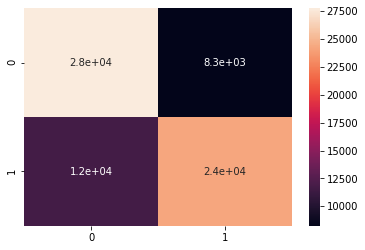

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

###Gráfico referente a Perda do modelo

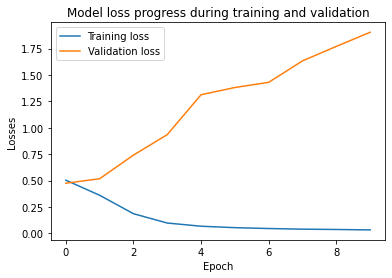

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training loss', 'Validation loss'])

###Gráfico referente a Acurácia do modelo

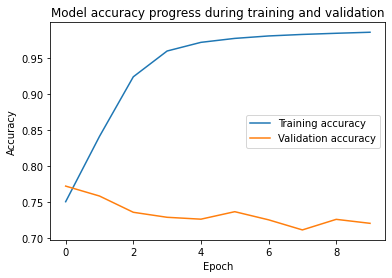

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

###Previsões

In [ ]:
text = 'i hate you'
text = tokenizer.encode(text)
text

[265, 64, 3853]

In [ ]:
Dcnn(np.array([text]), training=False).numpy()

array([[6.8728135e-05]], dtype=float32)